(     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocya

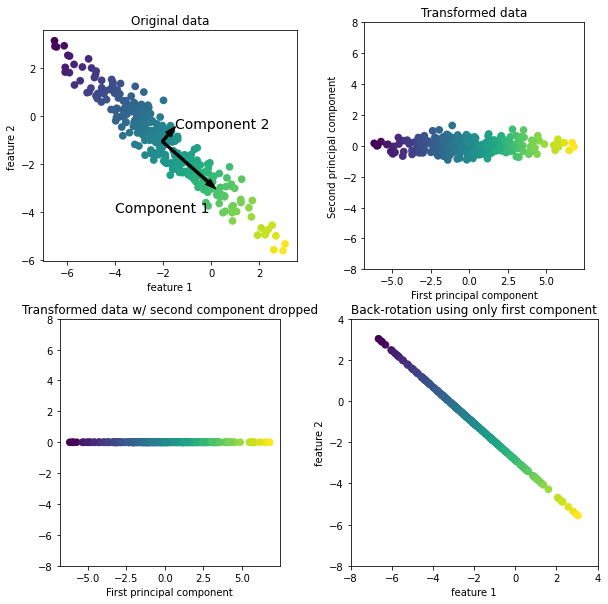

In [36]:
from sklearn.datasets import load_wine #https://www.youtube.com/watch?v=g-Hb26agBFg
import mglearn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

data=load_wine(return_X_y=True,as_frame=False)[0] #tuplas con los datos
print(load_wine(return_X_y=True,as_frame=True))
wine=load_wine()

mglearn.plots.plot_pca_illustration()
pca=PCA(n_components=2)
pca.fit(data)  #toma como variables los datos con mayor variabilidad y covarianza para reducir la dimensionalidad

transformada=pca.transform(data)
print(data.shape)
print("transformada\n",transformada)
print(transformada.shape)



Text(0, 0.5, 'Componente pca 2')

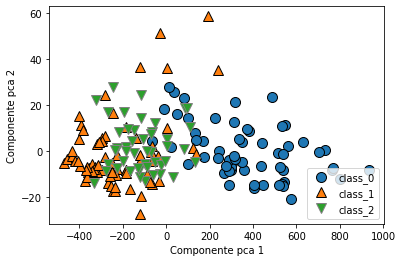

In [37]:
#crea el grafico con las dos columnas creadas al reducir dimencionalidad, y los separa en 3 clusters asociados por el metodo
# wine
mglearn.discrete_scatter(transformada[:,0], transformada[:,1], wine.target)
plt.legend(wine.target_names, loc='lower right')
plt.xlabel('Componente pca 1')
plt.ylabel('Componente pca 2')

Puntaje:  0.37


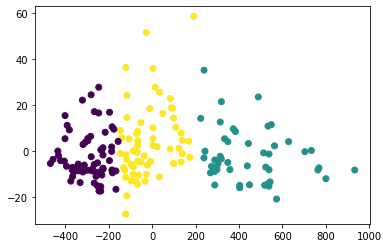

In [38]:
#ingreso los datos creados por PCA al metodo de K-Means para analizar el nivel de prediccion del modelo

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

etiquetas = wine.target
 
k_means = KMeans(n_clusters=3, max_iter=2000) 
k_means.fit(transformada)
 
predicciones=k_means.predict(transformada)
 
score=metrics.adjusted_rand_score(etiquetas, predicciones)

print("Puntaje: ",round(score,2)) #El valor es bajo, de 0.37, no es una buena prediccion
plt.scatter(transformada[:, 0], transformada[:, 1], c=predicciones)

plt.show()

Text(0, 0.5, 'Componente pca 2')

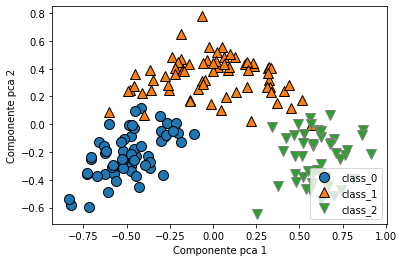

In [39]:
#Ahora aplicamos el reescalado de datos entre 0 y 1, permitiendo comparar variables distintas entre si

from sklearn.preprocessing import MinMaxScaler
escala=MinMaxScaler()
escala.fit(data)
escalada=escala.transform(data)
pca.fit(escalada)
transformada=pca.transform(escalada)
mglearn.discrete_scatter(transformada[:,0], transformada[:,1], wine.target)
plt.legend(wine.target_names, loc='lower right')
plt.xlabel('Componente pca 1')
plt.ylabel('Componente pca 2')
#Los datos se ven mejor diferenciados

Puntaje:  0.85


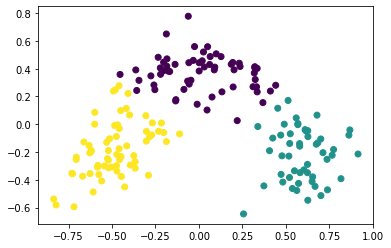

In [40]:
k_means = KMeans(n_clusters=3, max_iter=2000) 
k_means.fit(transformada)
 
predicciones=k_means.predict(transformada)
 
score=metrics.adjusted_rand_score(etiquetas, predicciones)

print("Puntaje: ",round(score,2)) #Con el reescalado, si ingreso los datos en el metodo k-means, mejora mucho la prediccion, con 0.85
plt.scatter(transformada[:, 0], transformada[:, 1], c=predicciones)

plt.show()

Puntaje:  0.85


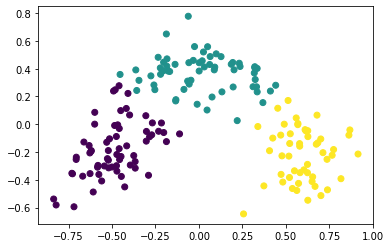

In [41]:
#Ahora realizo el clustering con el metodo de miniBatchKmeans, utilizando los datos obtenidos por el metodo PCA
from sklearn.cluster import MiniBatchKMeans
MBk_means = MiniBatchKMeans(n_clusters=3,max_iter=2000,batch_size=1024)
MBk_means.fit(transformada)
predicciones=MBk_means.predict(transformada)
score=metrics.adjusted_rand_score(etiquetas, predicciones)

print("Puntaje: ",round(score,2)) #Se llega practicamente al mismo resultado, y como realiza menos calculos, es mejor en este 
#caso usar este metodo
plt.scatter(transformada[:, 0], transformada[:, 1], c=predicciones)

plt.show()

In [42]:
#En conclusion, realizamos a un conjunto de datos de varias dimensiones una reduccion de la dimensionalidad a 2 componentes
#con el metodo de PCA, y aplicamos el metodo de K-means para agrupar los datos obtenidos por PCA. Al tener ya diferenciado los 
#grupos en el conjunto de datos analizado (wines se diferencia para 3 clases de vinos), podemos ver que tan bien predijo el 
# modelo. Arriba podemos ver que si no escalamos los datos obtenidos en PCA, el puntaje de la prediccion por K-means 
# da muy baja comparando con los datos de vinos. Escalando los datos, la prediccion del clustering es buena, con una 
# puntacion de 0.85. Utilizando el metodo de MiniBatchK-means, llegamos al mismo resultado, y al tener menos carga 
# computacional, es preferible usarlo.